# WeatherPy
----

### Analysis
* A
* B
* C


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_csv = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90.000, 90.000)
lng_range = (-180.000, 180.000)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
rnd_size = 2000

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=rnd_size)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=rnd_size)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

747

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Fields for the OMW api
settings = {'units': 'metric', 'appid': api_key}

# Empty lists that will store relevant city weather info
city_ls = []
country_ls = []
lat_ls = []
lng_ls = []
date_ls = []
humidity_ls = []
cloudy_ls = []
max_temp_c_ls = []
wind_ls = []

# Iterating through all randomly-generated cities for weather data using wrapper
print(f"""Beginning Data Retrieval
--------------------------------""")
counter = 0
for city in cities:
    try:
        current_weather = owm.get_current(city, **settings)
        counter += 1
            # Printing process log
        print(f"Processing Record {counter} | {current_weather['name']}, {current_weather['sys']['country']}")
            # Adding city info to lists to eventually add to DF below
        city_ls.append(current_weather['name'])
        country_ls.append(current_weather['sys']['country'])
        lat_ls.append(current_weather['coord']['lat'])
        lng_ls.append(current_weather['coord']['lon'])
        date_ls.append(current_weather['dt'])
        humidity_ls.append(current_weather['main']['humidity'])
        cloudy_ls.append(current_weather['clouds']['all'])
        max_temp_c_ls.append(current_weather['main']['temp_max'])
        wind_ls.append(current_weather['wind']['speed'])
    except:
        print('City not found. Skipping...')
        
print(f"""--------------------------------
Data Retrieval Complete
--------------------------------""")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | Tasiilaq, GL
Processing Record 2 | Bluff, AU
Processing Record 3 | Lima, PE
Processing Record 4 | Pritzwalk, DE
Processing Record 5 | Ogaminana, NG
Processing Record 6 | Shimoda, JP
Processing Record 7 | Puerto Ayora, EC
Processing Record 8 | Seoul, KR
Processing Record 9 | Jackson, US
Processing Record 10 | Longyearbyen, NO
Processing Record 11 | Rikitea, PF
Processing Record 12 | Esperance, TT
Processing Record 13 | Vilhena, BR
Processing Record 14 | Manggar, ID
Processing Record 15 | Busselton, AU
Processing Record 16 | Cabo San Lucas, MX
Processing Record 17 | Hilo, US
Processing Record 18 | Barrow, AR
Processing Record 19 | Saskylakh, RU
Processing Record 20 | Cape Town, ZA
Processing Record 21 | East London, ZA
Processing Record 22 | Padang, ID
City not found. Skipping...
Processing Record 23 | Codrington, AU
City not found. Skipping...
City not found. Skipping...
Processing Record 24 | Punta Arenas, 

Processing Record 205 | Dikson, RU
Processing Record 206 | Lebu, ET
Processing Record 207 | Tuktoyaktuk, CA
City not found. Skipping...
Processing Record 208 | Henties Bay, NA
Processing Record 209 | Calhoun, US
Processing Record 210 | Boulsa, BF
Processing Record 211 | Kassala, SD
Processing Record 212 | Lavrentiya, RU
Processing Record 213 | Kaitangata, NZ
Processing Record 214 | Paso de Carrasco, UY
Processing Record 215 | Luderitz, NA
Processing Record 216 | Lufilufi, WS
Processing Record 217 | Shar, NG
Processing Record 218 | Bako, NG
Processing Record 219 | Camargo, MX
Processing Record 220 | Graaff-Reinet, ZA
Processing Record 221 | Chikhli, IN
Processing Record 222 | Chuy, UY
City not found. Skipping...
Processing Record 223 | San Cristobal, EC
Processing Record 224 | Wasilla, US
Processing Record 225 | Port Alfred, ZA
Processing Record 226 | Jamestown, AU
Processing Record 227 | Sorland, NO
Processing Record 228 | Taucha, DE
Processing Record 229 | Brae, GB
Processing Record 2

Processing Record 411 | Mahajanga, MG
City not found. Skipping...
Processing Record 412 | Road Town, VG
Processing Record 413 | Yumen, CN
Processing Record 414 | Murovani Kurylivtsi, UA
Processing Record 415 | Bilma, NE
Processing Record 416 | Khandyga, RU
Processing Record 417 | Waipawa, NZ
Processing Record 418 | Cidreira, BR
Processing Record 419 | Sola, FI
City not found. Skipping...
Processing Record 420 | Morondava, MG
Processing Record 421 | Tabas, IR
Processing Record 422 | Valparaiso, US
City not found. Skipping...
Processing Record 423 | Ola, RU
Processing Record 424 | Batagay-Alyta, RU
Processing Record 425 | Nkhotakota, MW
Processing Record 426 | Taksimo, RU
Processing Record 427 | Galveston, US
Processing Record 428 | Boyolangu, ID
Processing Record 429 | Vardo, US
Processing Record 430 | Ayan, TR
Processing Record 431 | Freeport, BS
Processing Record 432 | Kyaikkami, MM
Processing Record 433 | Souillac, FR
Processing Record 434 | Rocha, UY
Processing Record 435 | Lukovets

Processing Record 611 | Nhlangano, SZ
Processing Record 612 | Den Helder, NL
Processing Record 613 | Moron, VE
Processing Record 614 | Rio Branco do Sul, BR
Processing Record 615 | Mayo, CA
Processing Record 616 | Vestmannaeyjar, IS
Processing Record 617 | Gamba, CN
Processing Record 618 | Agirish, RU
Processing Record 619 | Sabang, PH
Processing Record 620 | Tubuala, PA
City not found. Skipping...
Processing Record 621 | Xian, ES
Processing Record 622 | Moindou, NC
Processing Record 623 | Diapaga, BF
City not found. Skipping...
Processing Record 624 | Pangnirtung, CA
Processing Record 625 | Samagaltay, RU
Processing Record 626 | Dzilam Gonzalez, MX
Processing Record 627 | Loreto, PY
City not found. Skipping...
Processing Record 628 | Apaseo el Alto, MX
Processing Record 629 | Santa Maria la Alta, MX
Processing Record 630 | Spring Valley, US
City not found. Skipping...
Processing Record 631 | Tibacuy, CO
Processing Record 632 | Ocean City, US
Processing Record 633 | Barkot, IN
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Organizing the relevant city weather information into a DF using the lists generated earlier
city_weather_df = pd.DataFrame({"City": city_ls,
                                "Country": country_ls,
                                "Lat": lat_ls,
                                "Lng": lng_ls,
                                "Date": date_ls,
                                "Humidity": humidity_ls,
                                "Cloudiness": cloudy_ls,
                                "Max Temp (Celsius)": max_temp_c_ls,
                                "Wind Speed (km/hr)": wind_ls
                               })

# Export city data to csv
city_weather_df.to_csv('city_weather.csv', index=False)

city_weather_df.count()

City                  671
Country               671
Lat                   671
Lng                   671
Date                  671
Humidity              671
Cloudiness            671
Max Temp (Celsius)    671
Wind Speed (km/hr)    671
dtype: int64

In [13]:
city_weather_df = pd.read_csv('city_weather.csv')

city_weather_df.head(10)

,City,Country,Lat,Lng,Date,Humidity,Cloudiness,Max Temp (Celsius),Wind Speed (km/hr)
0,Tasiilaq,GL,65.61,-37.64,1553608200,63,75,-2.00,5.70
1,Bluff,AU,-23.58,149.07,1553612162,66,88,26.27,3.37
2,Lima,PE,-12.06,-77.04,1553611930,78,90,23.33,1.17
3,Pritzwalk,DE,53.15,12.18,1553612121,71,56,8.89,5.36
4,Ogaminana,NG,7.60,6.20,1553612163,43,24,34.22,2.07
5,Shimoda,JP,34.70,138.93,1553610787,81,24,5.00,3.07
6,Puerto Ayora,EC,-0.74,-90.35,1553611542,83,75,27.00,4.10
7,Seoul,KR,37.57,126.98,1553611200,70,1,8.00,0.50
8,Jackson,US,35.61,-88.82,1553611903,61,20,10.00,3.60
9,Longyearbyen,NO,78.22,15.63,1553610000,72,40,-11.00,2.10


In [27]:
# Getting the Date from the data for my sick charts
unix_avg = round(sum(date_ls)/len(date_ls))

local_time = datetime.fromtimestamp(unix_avg)
pretty_local_time = local_time.strftime("%d-%m-%Y")
pretty_local_time

'26-03-2019'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

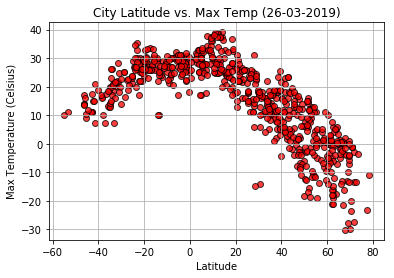

In [57]:
x_city_lat = city_weather_df['Lat']

plt.scatter(x_city_lat, city_weather_df['Max Temp (Celsius)'], edgecolors='black', alpha='0.75', color='r')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.title(f"City Latitude vs. Max Temp ({pretty_local_time})");

plt.savefig('temp_v_lat.png')

#### Latitude vs. Humidity Plot

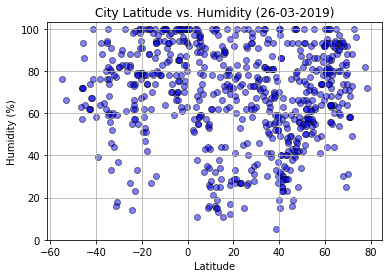

In [58]:
plt.scatter(x_city_lat, city_weather_df['Humidity'], edgecolors='black', alpha='0.5', color = 'blue')
plt.grid()
plt.ylim(0,103)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity ({pretty_local_time})");

plt.savefig('humid_v_lat.png')

#### Latitude vs. Cloudiness Plot

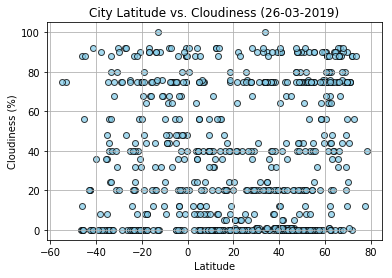

In [59]:
plt.scatter(x_city_lat, city_weather_df['Cloudiness'], edgecolors='black', alpha='0.75', color = 'SkyBlue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness ({pretty_local_time})");

plt.savefig('cloudy_v_lat.png')

#### Latitude vs. Wind Speed Plot

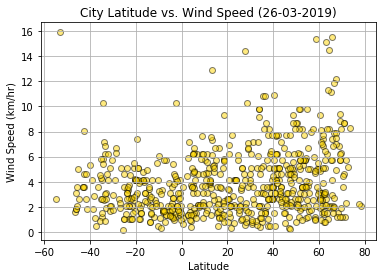

In [60]:
plt.scatter(x_city_lat, city_weather_df['Wind Speed (km/hr)'], edgecolors='black', alpha='0.5', color = 'gold')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/hr)')
plt.title(f"City Latitude vs. Wind Speed ({pretty_local_time})");

plt.savefig('wind_v_lat.png')